<h1>Sentiment Analysis</h1>
It is way to analyse the emotional tone of message whether it is positive, negative or neutral

In this notebook we gonna analyse the sentiment of a given review.
Here we gonna apply Supervised Machine Learning Multi class text Classification
Performance metrics: Accuracy and Confusion Matrix

Dataset Link: <href>https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews</href>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df["ProfileName"]=df["ProfileName"].fillna(df["ProfileName"].mode()[0])
df["Summary"]=df["Summary"].fillna(df["Summary"].mode()[0])

In [8]:
df.isnull().sum() #Now we have removed all null values

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
df.shape

(568454, 10)

In [10]:
#Removing duplicate based on features
df.drop_duplicates(inplace=True,subset=["Text"])

In [11]:
df.shape

(393579, 10)

In [12]:
#creating a Feature named Target
df["Target"]=df["Score"].apply(lambda x: "Positive" if x>3 else ('Negative' if x<3 else "Neutral"))

In [14]:
targetbar=df["Target"].value_counts()
targetbar

Target
Positive    306758
Negative     57067
Neutral      29754
Name: count, dtype: int64

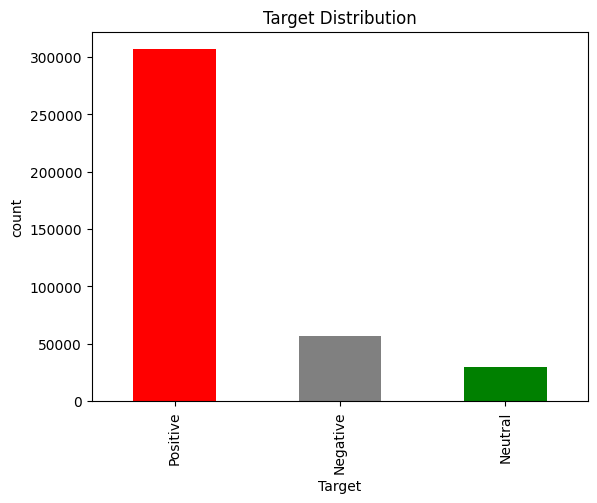

In [15]:
targetbar.plot(kind="bar",color=["red","gray",'green'])
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("count")
plt.show()

In [16]:
# this imabalanced dataset so we are downsampling here
neutral = df.loc[df.Target=="Neutral"] 
positive = df.loc[df.Target=="Positive"].sample(40000)
negative = df.loc[df.Target=="Negative"].sample(40000)
df = pd.concat([positive, negative, neutral])
df.shape

(109754, 11)

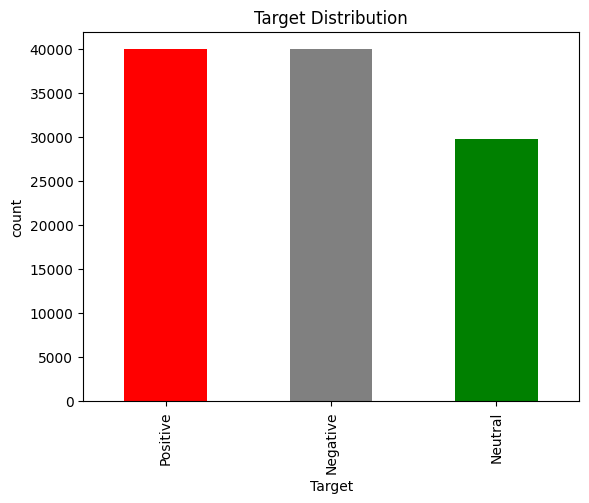

In [17]:
targetbar=df["Target"].value_counts()
targetbar.plot(kind="bar",color=["red","gray",'green'])
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("count")
plt.show()

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
total_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
negative_words=set(word for word in total_stopwords if "n't" in word or "no" in word)

In [20]:
final_stopwords=total_stopwords-negative_words
print(final_stopwords)

{'their', 'her', 'own', "you're", "you'll", 'weren', 'such', 'them', 'don', 'each', 'm', 'to', 'are', 's', 'and', 'haven', 'from', 'should', 'the', 'of', 'whom', 'yourself', 'more', 'what', 'o', 'doing', 'about', 'its', 'which', 'into', 'can', 'again', 'your', 'y', 'out', 'needn', 'between', 'is', 'an', 'below', 'did', 'through', "should've", 'couldn', 'who', 'does', 't', 'theirs', 'ain', 'him', 'wouldn', 'you', 'itself', 'some', 'do', 'won', 'd', 'how', 'we', 'than', 'there', 'me', 'mustn', 'so', 'ma', "that'll", 'off', 'hadn', 'has', 'themselves', 'isn', 'against', "you've", 'ours', 'ourselves', 'just', 'shouldn', 'wasn', 'been', 've', 'only', 'didn', "she's", 'she', 'further', 'those', 'other', 'having', 'our', 'this', 'until', 'most', 'up', 'had', 'aren', 'it', 'yourselves', 'doesn', 'as', 'before', 'that', 'at', 'on', 'll', 'both', 'myself', "it's", 'where', 'were', 'very', 'few', 'or', 'any', 'am', 'with', 'mightn', 'yours', 'same', 'by', 'hasn', 'a', 'under', 'he', 'these', 'her

In [21]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [22]:
import regex as re
import string
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

In [23]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)
    
    # remove digits
    review = review.translate(remove_digits)
    
    # lower case all letters
    review = review.lower()
    
    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]
    
    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [24]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Target
326177,326178,B001EQ53RE,A23HSTIOSL9XVQ,Jim,0,0,5,1331942400,Curry,"This is my most favorite curry. Smooth, flavo...",Positive
568230,568231,B003VWU7IE,A28QTVEFQX6Y9X,Annette,0,0,5,1319760000,My Frenchie approves,These treats smell so good I was tempted to ta...,Positive
446076,446077,B003ZICQ60,A2EWZU60S83SYQ,Crusader,0,0,5,1297468800,Great tasting / very smooth coffee !,This candy apple flavor really tastes great! I...,Positive
293196,293197,B000LKXNG2,A1L9E4OA926W9B,Jeanne Scott,0,0,5,1273104000,Good Syrup,This is a good product but with great prices a...,Positive
453884,453885,B0014BSMT0,AFNYJIANTUB7U,Dana Veca,1,1,5,1330041600,Chocolate heaven!,These cookies were absolutely perfect for a Va...,Positive
...,...,...,...,...,...,...,...,...,...,...,...
568336,568337,B001BOAOLY,A3CMHE6IJV79QM,Nancy J. Lumpkins,0,0,3,1285459200,Not Enough Lemon!,These taste basically as if there is no lemon ...,Neutral
568355,568356,B002XO3Q52,A7DMNT5YZ3JV1,RJT,0,0,3,1334534400,Paid too much,I paid well over labeled price and the produc...,Neutral
568369,568370,B000LKVRQA,A2ZX818P92CM7F,"Gregg Somers ""chillerdad""",1,2,3,1282694400,This is Earl Grey!???,"An admitted fan of Stash Earl Grey, neverthele...",Neutral
568379,568380,B000H28ABW,A1XVKAMXSOW8ZV,"C. E. Hunsicker ""Hatshepsut""",2,3,3,1256515200,Just OK,I hadn't tried this taco seasoning prior to pu...,Neutral


In [25]:
print("Before preprocessing : ")
df.Text.iloc[6]

Before preprocessing : 


'Product was just as I expected and shipped fairly quickly. Most importantly, they taste fresh! Just as good as I when I got hooked on them when I vacationed in Hawaii!!'

In [26]:
df.Text = df.Text.apply(preprocessor) 
print("After preprocessing : ")
df.Text.iloc[6]

After preprocessing : 


'product expect ship fairli quickli importantli tast fresh good got hook vacat hawaii'

In [27]:
def generate_wcloud(text):
    stopwords = set(final_stopwords)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

In [28]:
from wordcloud import WordCloud

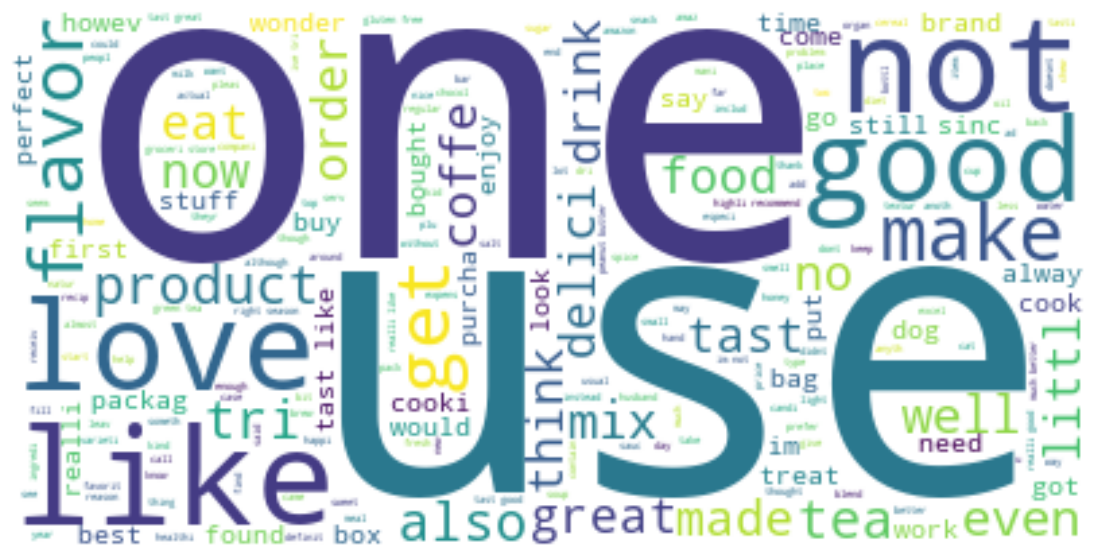

In [29]:
pos = df.loc[df.Target=="Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

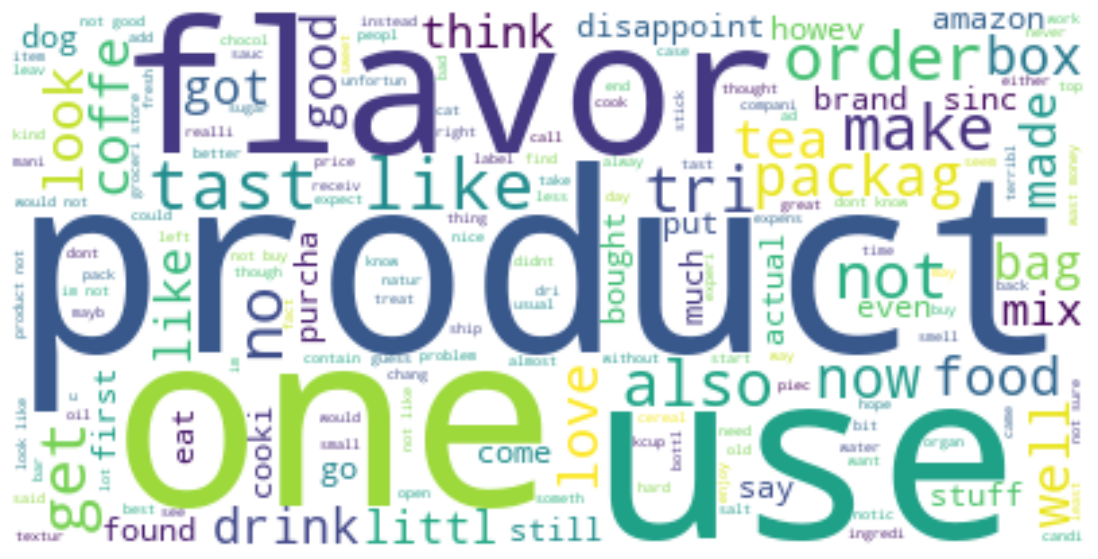

In [30]:
pos = df.loc[df.Target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

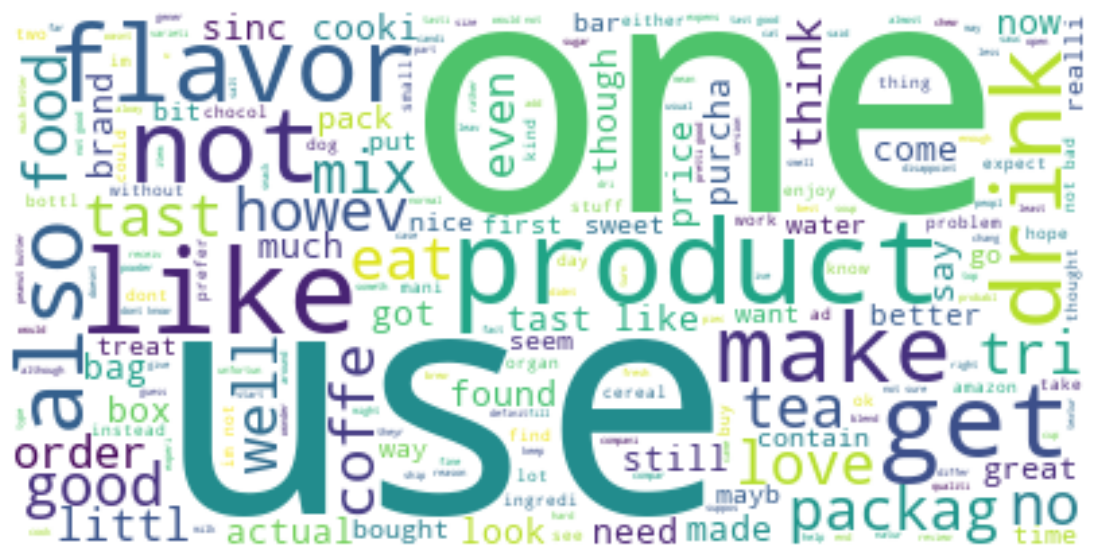

In [31]:
pos = df.loc[df.Target=="Neutral"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

In [32]:
X = df.Text
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Bag of word

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [44]:
bow_X_train

<87803x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 2951994 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)


In [39]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Neutral', 'Positive']


In [40]:
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=1000, random_state=1)
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=1000, random_state=1)
Train accuracy score : 0.6870152500484038
Test accuracy score : 0.677007881189923

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=1000, random_state=1)
Train accuracy score : 0.7296333838251541
Test accuracy score : 0.7022003553368867

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=1000, random_state=1)
Train accuracy score : 0.7619557418311447
Test accuracy score : 0.7038859277481664

 ----------------------------------------

LogisticRegression(C=1, max_iter=1000, random_state=1)
Train accuracy score : 0.7852920743027003
Test accuracy score : 0.6868935356020227

 ----------------------------------------

LogisticRegression(C=10, max_iter=1000, random_state=1)
Train accuracy score : 0.7945400498844003
Test accuracy score : 0.6722700560338937

 ----------------------------------------


In [57]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    return plt.show()

In [59]:
bmodel = LogisticRegression(C=1, max_iter=1000, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=1)

In [60]:
y_preds_train = bmodel.predict(tfidf_X_train)
y_preds_test = bmodel.predict(tfidf_X_test)

In [61]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.7585390020842112
Test accuracy score : 0.7094893171153934


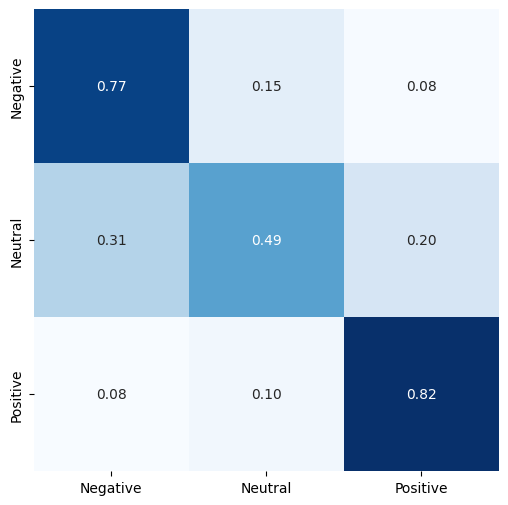

In [62]:
plot_cm(y_test, y_preds_test)
